NLP PROJECT - EMOTION CLASSIFIER - JIHYO PARK, PAVAN EDA

IMPORT LIBRARIES

In [55]:
import pandas as pd
import nltk
import copy
import matplotlib.pyplot as plt
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
import seaborn as sns

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import sparse_categorical_crossentropy

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('vader_lexicon')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /Users/jihyo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/jihyo/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/jihyo/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/jihyo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

LOAD CSV FILE & DATA CLEANING

In [56]:
# LOAD THE CSV FILE
emotion_file_path = "text.csv"
emotion_data = pd.read_csv(emotion_file_path)

# HEAD
emotion_data.head()

,Unnamed: 0,text,label
0,0,i just feel really helpless and heavy hearted,4
1,1,ive enjoyed being able to slouch about relax a...,0
2,2,i gave up my internship with the dmrg and am f...,4
3,3,i dont know i feel so lost,0
4,4,i am a kindergarten teacher and i am thoroughl...,4


In [57]:
emotion_data.text

0             i just feel really helpless and heavy hearted
1         ive enjoyed being able to slouch about relax a...
2         i gave up my internship with the dmrg and am f...
3                                i dont know i feel so lost
4         i am a kindergarten teacher and i am thoroughl...
                                ...                        
416804    i feel like telling these horny devils to find...
416805    i began to realize that when i was feeling agi...
416806    i feel very curious be why previous early dawn...
416807    i feel that becuase of the tyranical nature of...
416808    i think that after i had spent some time inves...
Name: text, Length: 416809, dtype: object

In [58]:
# CHECK IF THERE ARE ANY DUPLICATES
emotion_data.duplicated().sum()

0

In [59]:
emotion_data = emotion_data.drop(columns='Unnamed: 0')

DATA VISUALIZATION

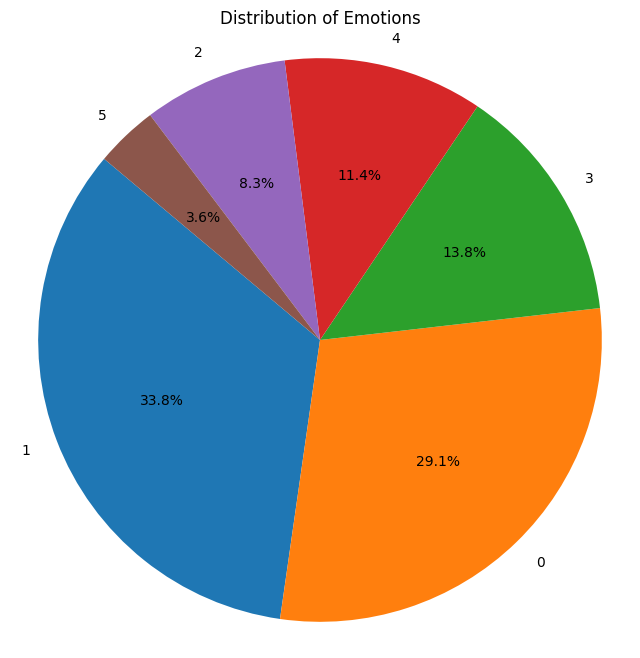

In [60]:
# Number of each label
label_counts = emotion_data['label'].value_counts()

# Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Emotions')
plt.axis('equal')
plt.show()

POST TAGS AND TOKENIZERS

In [61]:
# POST TAGS AND TOKENIZERS
postag = dict()

tokens = copy.deepcopy(emotion_data.text)

for i in range(30):
   # has tokenizers
   tokens[i] = nltk.word_tokenize(emotion_data.text[i])

   # post tags
   postag[i] = nltk.pos_tag(tokens[i])
   
postag


{0: [('i', 'NN'),
  ('just', 'RB'),
  ('feel', 'VB'),
  ('really', 'RB'),
  ('helpless', 'JJ'),
  ('and', 'CC'),
  ('heavy', 'JJ'),
  ('hearted', 'VBD')],
 1: [('ive', 'JJ'),
  ('enjoyed', 'VBD'),
  ('being', 'VBG'),
  ('able', 'JJ'),
  ('to', 'TO'),
  ('slouch', 'VB'),
  ('about', 'IN'),
  ('relax', 'NN'),
  ('and', 'CC'),
  ('unwind', 'NN'),
  ('and', 'CC'),
  ('frankly', 'RB'),
  ('needed', 'VBD'),
  ('it', 'PRP'),
  ('after', 'IN'),
  ('those', 'DT'),
  ('last', 'JJ'),
  ('few', 'JJ'),
  ('weeks', 'NNS'),
  ('around', 'IN'),
  ('the', 'DT'),
  ('end', 'NN'),
  ('of', 'IN'),
  ('uni', 'JJ'),
  ('and', 'CC'),
  ('the', 'DT'),
  ('expo', 'NN'),
  ('i', 'NN'),
  ('have', 'VBP'),
  ('lately', 'RB'),
  ('started', 'VBN'),
  ('to', 'TO'),
  ('find', 'VB'),
  ('myself', 'PRP'),
  ('feeling', 'VBG'),
  ('a', 'DT'),
  ('bit', 'NN'),
  ('listless', 'JJ'),
  ('which', 'WDT'),
  ('is', 'VBZ'),
  ('never', 'RB'),
  ('really', 'RB'),
  ('a', 'DT'),
  ('good', 'JJ'),
  ('thing', 'NN')],
 2: [('i',

SENTIMENT ANALYSIS

In [62]:
sia = SentimentIntensityAnalyzer()

# Calculating polarity scores of each sentence
e_scores = dict()

for i in range(30):
    e_scores[i] = sia.polarity_scores(emotion_data.text[i])

e_scores

{0: {'neg': 0.354, 'neu': 0.646, 'pos': 0.0, 'compound': -0.5095},
 1: {'neg': 0.054, 'neu': 0.786, 'pos': 0.159, 'compound': 0.6221},
 2: {'neg': 0.255, 'neu': 0.638, 'pos': 0.106, 'compound': -0.4767},
 3: {'neg': 0.428, 'neu': 0.572, 'pos': 0.0, 'compound': -0.4572},
 4: {'neg': 0.205, 'neu': 0.795, 'pos': 0.0, 'compound': -0.759},
 5: {'neg': 0.411, 'neu': 0.589, 'pos': 0.0, 'compound': -0.5413},
 6: {'neg': 0.0, 'neu': 0.717, 'pos': 0.283, 'compound': 0.807},
 7: {'neg': 0.101, 'neu': 0.566, 'pos': 0.333, 'compound': 0.8126},
 8: {'neg': 0.124, 'neu': 0.876, 'pos': 0.0, 'compound': -0.1779},
 9: {'neg': 0.35, 'neu': 0.43, 'pos': 0.22, 'compound': -0.1321},
 10: {'neg': 0.085, 'neu': 0.699, 'pos': 0.215, 'compound': 0.6133},
 11: {'neg': 0.143, 'neu': 0.655, 'pos': 0.202, 'compound': 0.022},
 12: {'neg': 0.312, 'neu': 0.688, 'pos': 0.0, 'compound': -0.4717},
 13: {'neg': 0.056, 'neu': 0.678, 'pos': 0.266, 'compound': 0.8386},
 14: {'neg': 0.0, 'neu': 0.763, 'pos': 0.237, 'compound'

HEATMAP VISUALIZATION WITH POLARITY SCORES

In [63]:
neg = []
neu = []
pos = []
comp = []

for i in range(30):
    neg.append(e_scores[i]['neg'])
    neu.append(e_scores[i]['neu'])
    pos.append(e_scores[i]['pos'])
    comp.append(e_scores[i]['compound'])
    
pscore_array = [neg, neu, pos, comp]
classes = ["negative","neutral", "positive", "compound"]
series = (pd.DataFrame(pscore_array,classes))
np_array = series
np_array

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
negative,0.3540,0.0540,0.2550,0.4280,0.205,0.4110,0.000,0.1010,0.1240,0.3500,...,0.1530,0.0000,0.0000,0.2350,0.2080,0.1910,0.0000,0.1000,0.0,0.0000
neutral,0.6460,0.7860,0.6380,0.5720,0.795,0.5890,0.717,0.5660,0.8760,0.4300,...,0.6900,0.6300,0.4900,0.6120,0.6600,0.3700,0.5970,0.7570,1.0,0.5520
positive,0.0000,0.1590,0.1060,0.0000,0.000,0.0000,0.283,0.3330,0.0000,0.2200,...,0.1580,0.3700,0.5100,0.1530,0.1320,0.4380,0.4030,0.1430,0.0,0.4480
compound,-0.5095,0.6221,-0.4767,-0.4572,-0.759,-0.5413,0.807,0.8126,-0.1779,-0.1321,...,0.0258,0.7792,0.9677,-0.1531,-0.5462,0.4588,0.6597,0.2382,0.0,0.8074


Text(220.72222222222223, 0.5, 'Polarity Score Category')

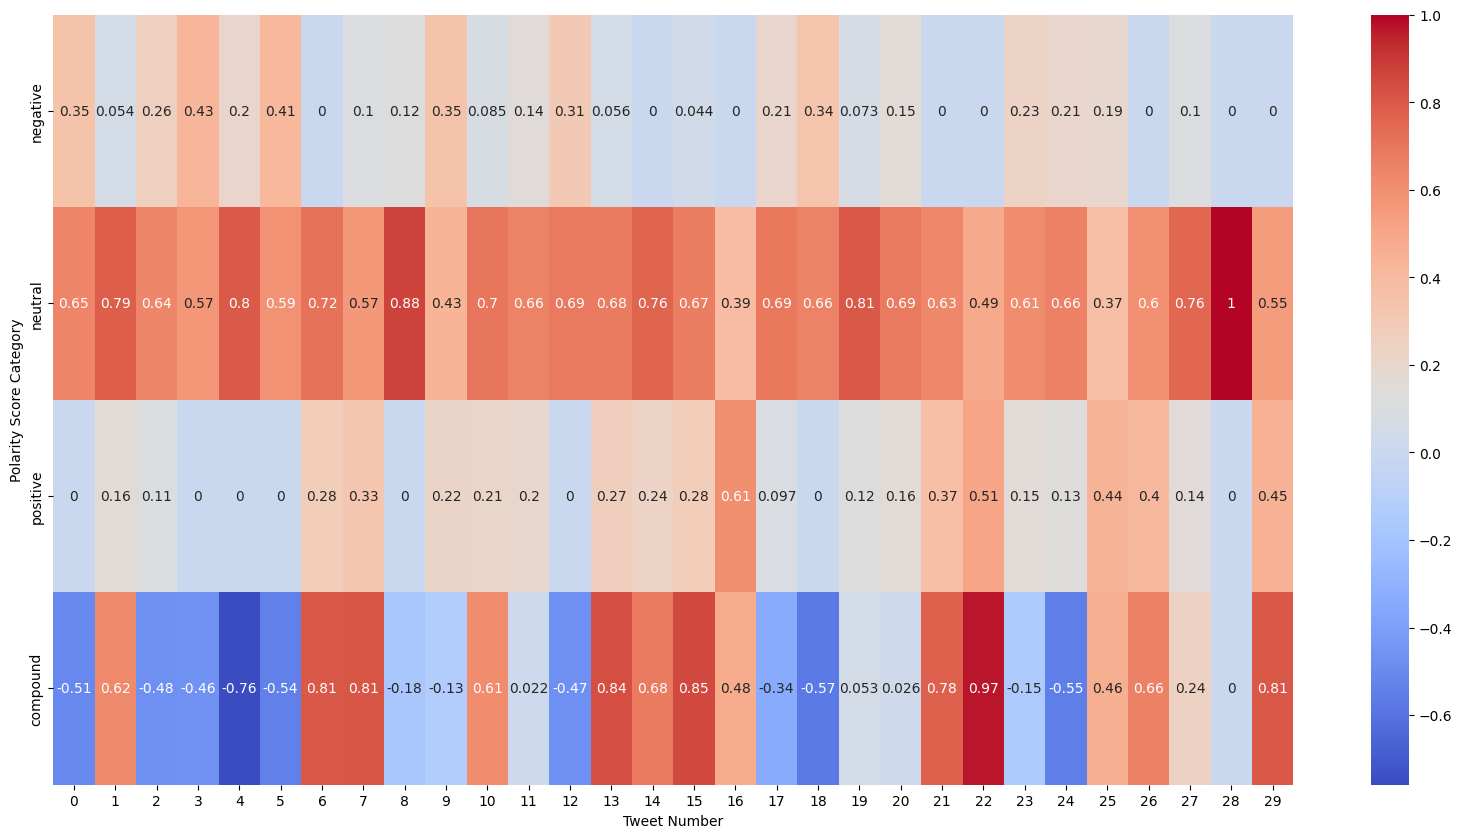

In [64]:
pscore_array = [neg, neu, pos, comp]

plt.figure(figsize=(20,10))
sns.heatmap(np_array,cmap = 'coolwarm',annot= True)

plt.xlabel("Tweet Number")
plt.ylabel("Polarity Score Category")

MORE DATA CLEANING

GET RID OF CAPITAL LETTERS

In [65]:
# Let's replace capital letters to lowercase letters for better accuracy and cleaner data
emotion_data['text'] = emotion_data['text'].str.lower()
emotion_data.head()

,text,label
0,i just feel really helpless and heavy hearted,4
1,ive enjoyed being able to slouch about relax a...,0
2,i gave up my internship with the dmrg and am f...,4
3,i dont know i feel so lost,0
4,i am a kindergarten teacher and i am thoroughl...,4


In [66]:
stop_words = set(stopwords.words('english'))
stop_words.remove('not')
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 're',
 's'

REMOVE STOPWORDS FOR CLEANER AND SIMPLER OUTPUTS

In [67]:
stop_words = stopwords.words('english')
emotion_data["text"] = emotion_data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

emotion_data.head()

,text,label
0,feel really helpless heavy hearted,4
1,ive enjoyed able slouch relax unwind frankly n...,0
2,gave internship dmrg feeling distraught,4
3,dont know feel lost,0
4,kindergarten teacher thoroughly weary job take...,4


In [68]:
#sad 0
# joy 1
# love 2
# anger 3
# suprise 4

sad = []
joy = []
love = []
anger = []
suprise = []


for i in range(len(emotion_data.text)):
    if(emotion_data.label[i] == 0):
        split_w = emotion_data.text[i].split()
        for j in split_w:
            sad.append(j)
    
    if(emotion_data.label[i] == 1):
        split_w = emotion_data.text[i].split()
        for j in split_w:
            joy.append(j)
            
    if(emotion_data.label[i] == 2):
        split_w = emotion_data.text[i].split()
        for j in split_w:
            love.append(j)
        
    if(emotion_data.label[i] == 3):
        split_w = emotion_data.text[i].split()
        for j in split_w:
            anger.append(j)
    
    if(emotion_data.label[i] == 4):
        split_w = emotion_data.text[i].split()
        for j in split_w:
            suprise.append(j)
        

joy




['fear',
 'ever',
 'feel',
 'delicious',
 'excitement',
 'christmas',
 'eve',
 'least',
 'way',
 'remember',
 'try',
 'nice',
 'though',
 'get',
 'bitchy',
 'person',
 'phone',
 'window',
 'feel',
 'free',
 'little',
 'fit',
 'throw',
 'pen',
 'face',
 'officially',
 'graduated',
 'im',
 'feeling',
 'ecstatic',
 'thought',
 'would',
 'feel',
 'portfolio',
 'demonstrates',
 'eager',
 'learn',
 'know',
 'better',
 'might',
 'call',
 'annoyingly',
 'persistent',
 'may',
 'biased',
 'next',
 'dependent',
 'life',
 'take',
 'care',
 'keep',
 'safe',
 'feel',
 'need',
 'take',
 'care',
 'well',
 'feel',
 'terrific',
 'feeling',
 'much',
 'stronger',
 'confident',
 'professional',
 'opinion',
 'know',
 'anything',
 'serious',
 'take',
 'shower',
 'feel',
 'wonderful',
 'energetic',
 'previous',
 'feelings',
 'life',
 'turn',
 'awesome',
 'feeling',
 'creating',
 'life',
 'like',
 'happiest',
 'life',
 'world',
 'feel',
 'like',
 'actually',
 'getting',
 'something',
 'useful',
 'able',
 'over

In [69]:
sad_dict = {}
joy_dict = {}
love_dict = {}
anger_dict = {}
suprise_dict = {}

for i in sad:
    if i in sad_dict:
        sad_dict[i] += 1
    else:
        sad_dict[i] = 1

for j in joy:
    if j in joy_dict:
        joy_dict[j] += 1
    else:
        joy_dict[j] = 1


for k in love:
    if k in love_dict:
        love_dict[k] += 1
    else:
        love_dict[k] = 1
        
for l in anger:
    if l in anger_dict:
        anger_dict[l] += 1
    else:
        anger_dict[l] = 1

for m in suprise:
    if m in suprise_dict:
        suprise_dict[m] += 1
    else:
        suprise_dict[m] = 1




sad_dict = dict(sorted(sad_dict.items(), key=lambda item: item[1], reverse=True))
joy_dict = dict(sorted(joy_dict.items(), key=lambda item: item[1], reverse=True))
love_dict = dict(sorted(love_dict.items(), key=lambda item: item[1], reverse=True))
anger_dict = dict(sorted(anger_dict.items(), key=lambda item: item[1], reverse=True))
suprise_dict = dict(sorted(suprise_dict.items(), key=lambda item: item[1], reverse=True))


anger_dict

{'feel': 37717,
 'feeling': 19236,
 'like': 10367,
 'im': 9298,
 'really': 3771,
 'know': 3399,
 'get': 3340,
 'people': 3074,
 'time': 2937,
 'little': 2826,
 'would': 2556,
 'want': 2535,
 'angry': 2273,
 'think': 2266,
 'dont': 2218,
 'even': 2191,
 'one': 2133,
 'things': 2082,
 'bit': 2007,
 'still': 1947,
 'ive': 1915,
 'way': 1905,
 'something': 1820,
 'much': 1748,
 'frustrated': 1720,
 'annoyed': 1665,
 'could': 1665,
 'going': 1655,
 'cant': 1628,
 'cold': 1602,
 'selfish': 1572,
 'stressed': 1552,
 'go': 1541,
 'right': 1505,
 'life': 1500,
 'irritated': 1494,
 'rude': 1477,
 'jealous': 1475,
 'bothered': 1459,
 'mad': 1459,
 'hated': 1452,
 'disgusted': 1446,
 'bitter': 1438,
 'pissed': 1427,
 'resentful': 1424,
 'irritable': 1403,
 'bitchy': 1393,
 'day': 1391,
 'dangerous': 1379,
 'impatient': 1379,
 'make': 1377,
 'rushed': 1375,
 'need': 1364,
 'distracted': 1359,
 'agitated': 1353,
 'grumpy': 1353,
 'dissatisfied': 1352,
 'cranky': 1351,
 'wronged': 1347,
 'offended': 

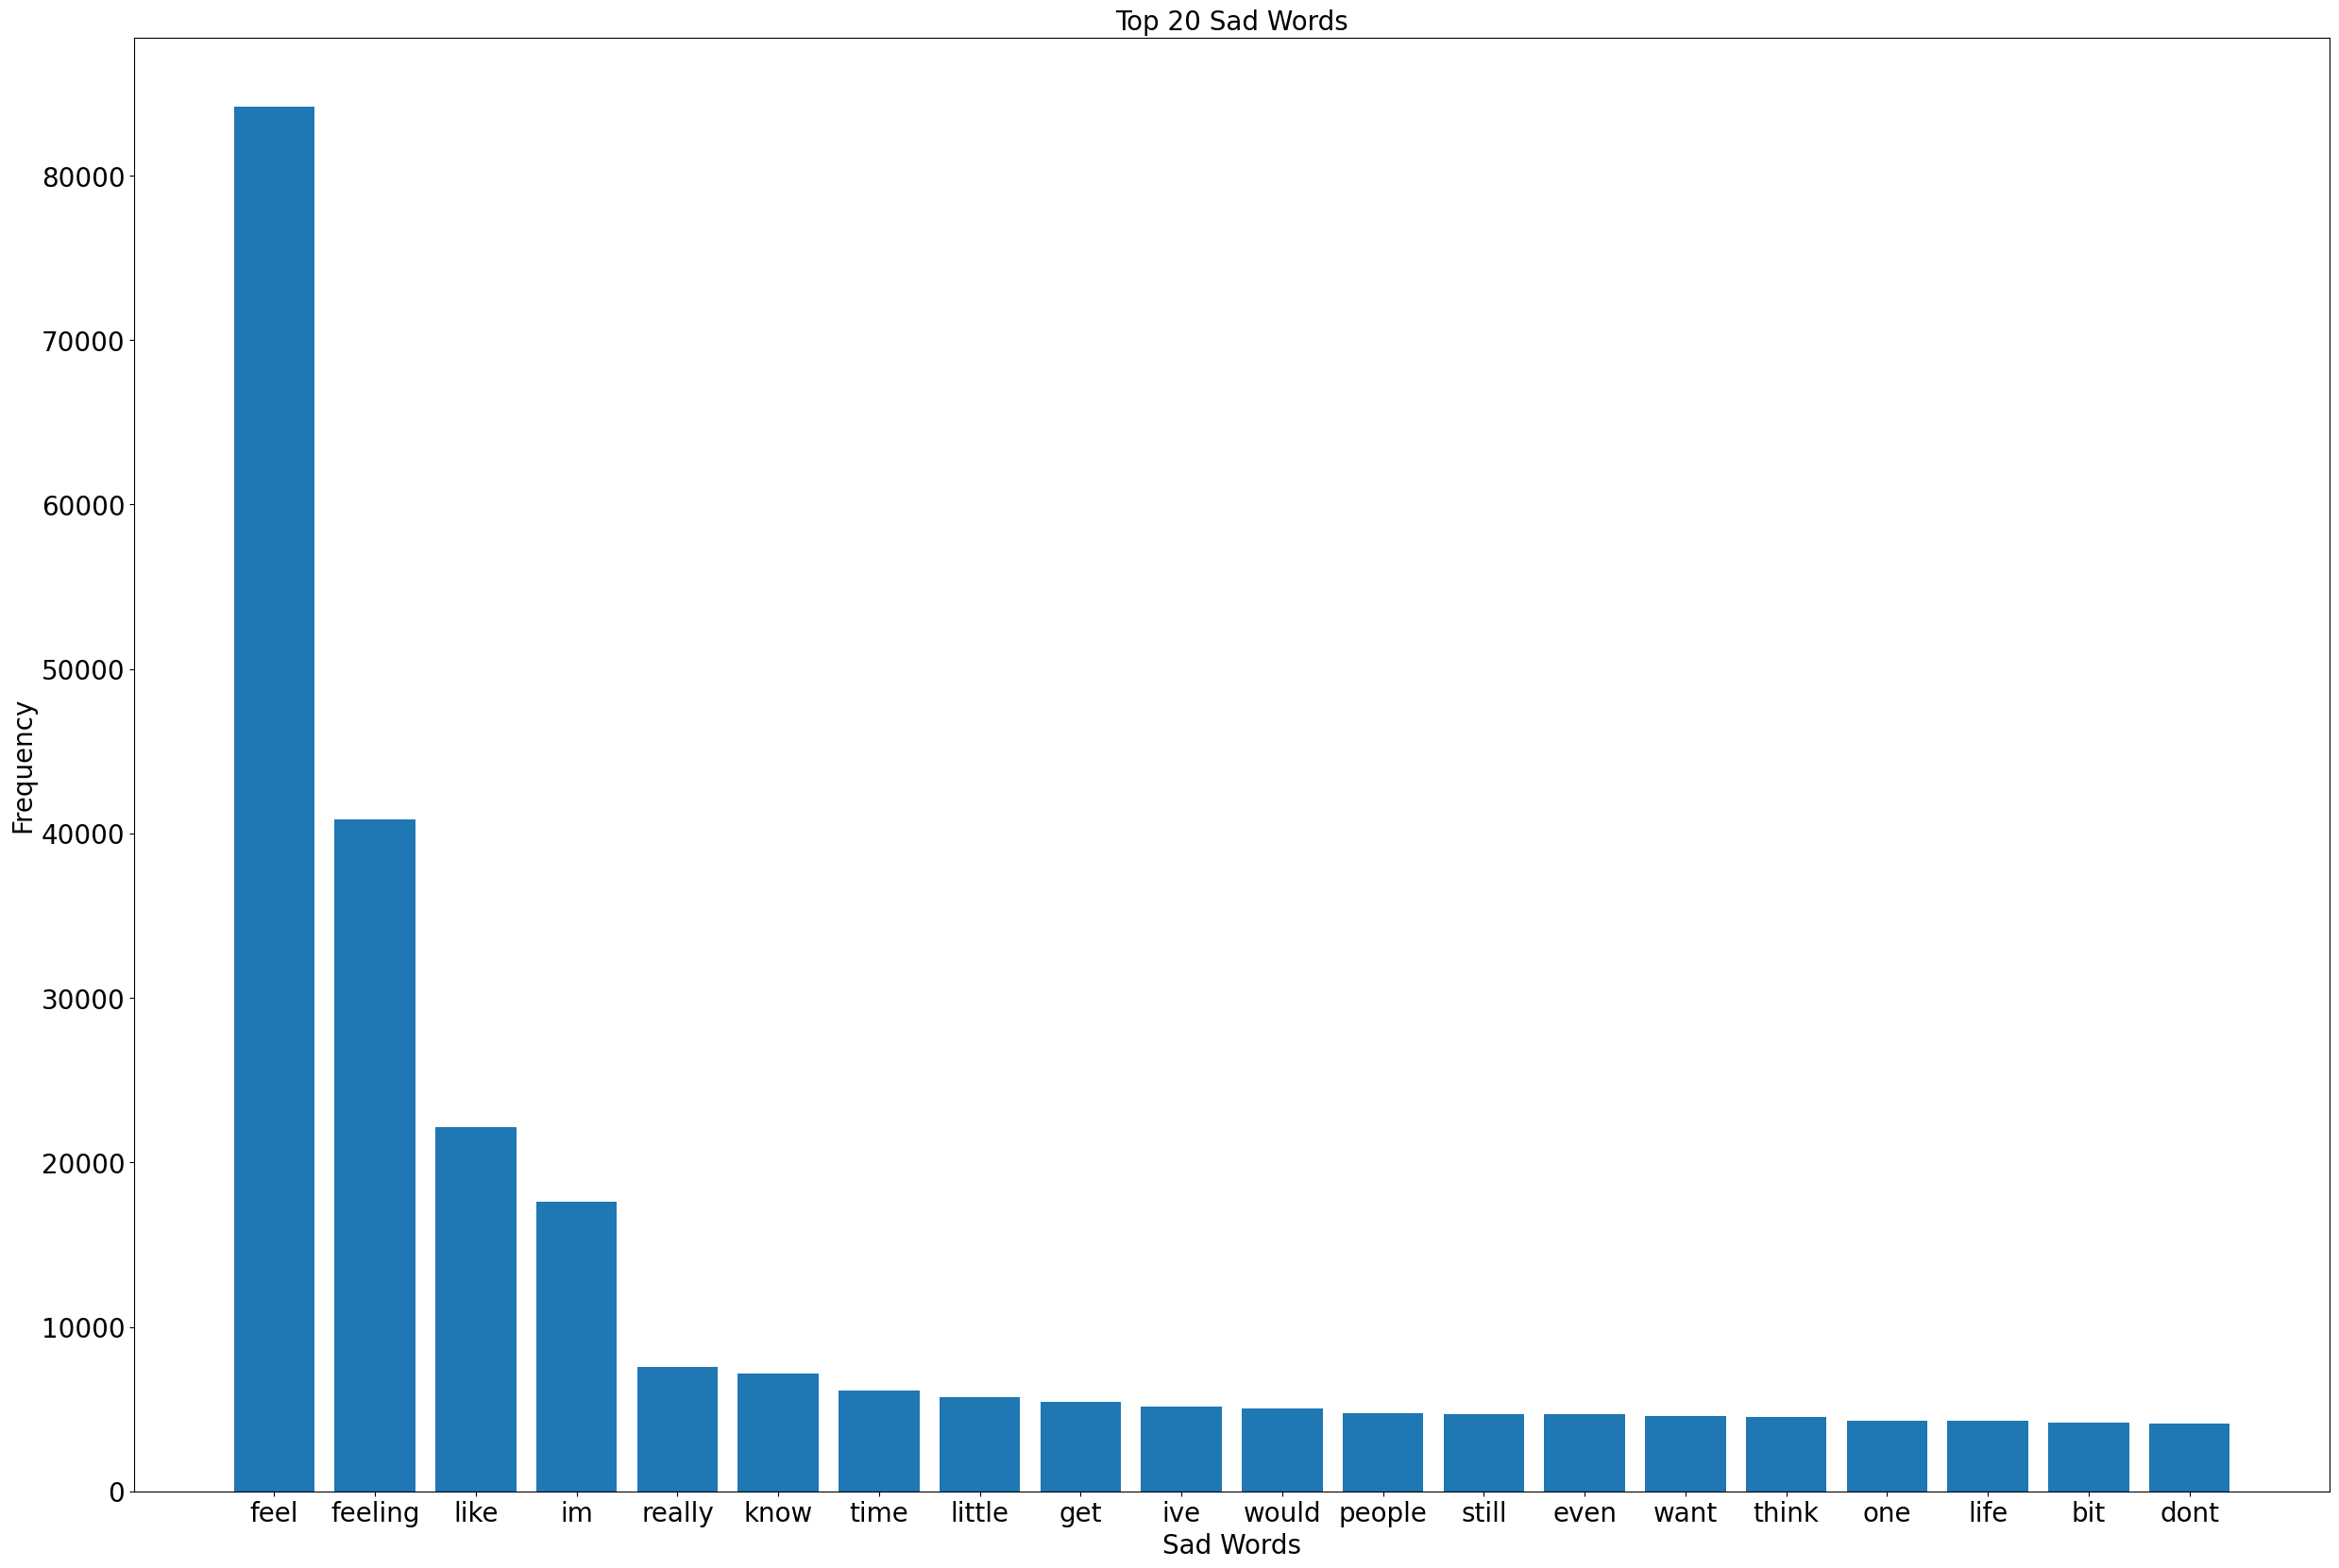

In [70]:
x = list(sad_dict.keys())[:20]
y = [value for key, value in list(sad_dict.items())[:20]]

plt.figure(figsize=(30,20))

plt.bar(x,y)
plt.xticks(fontsize=20)

plt.xlabel("Sad Words", fontsize=20)

plt.ylabel("Frequency", fontsize=20)

plt.yticks(fontsize=20)
plt.title("Top 20 Sad Words", fontsize=20)

plt.show()


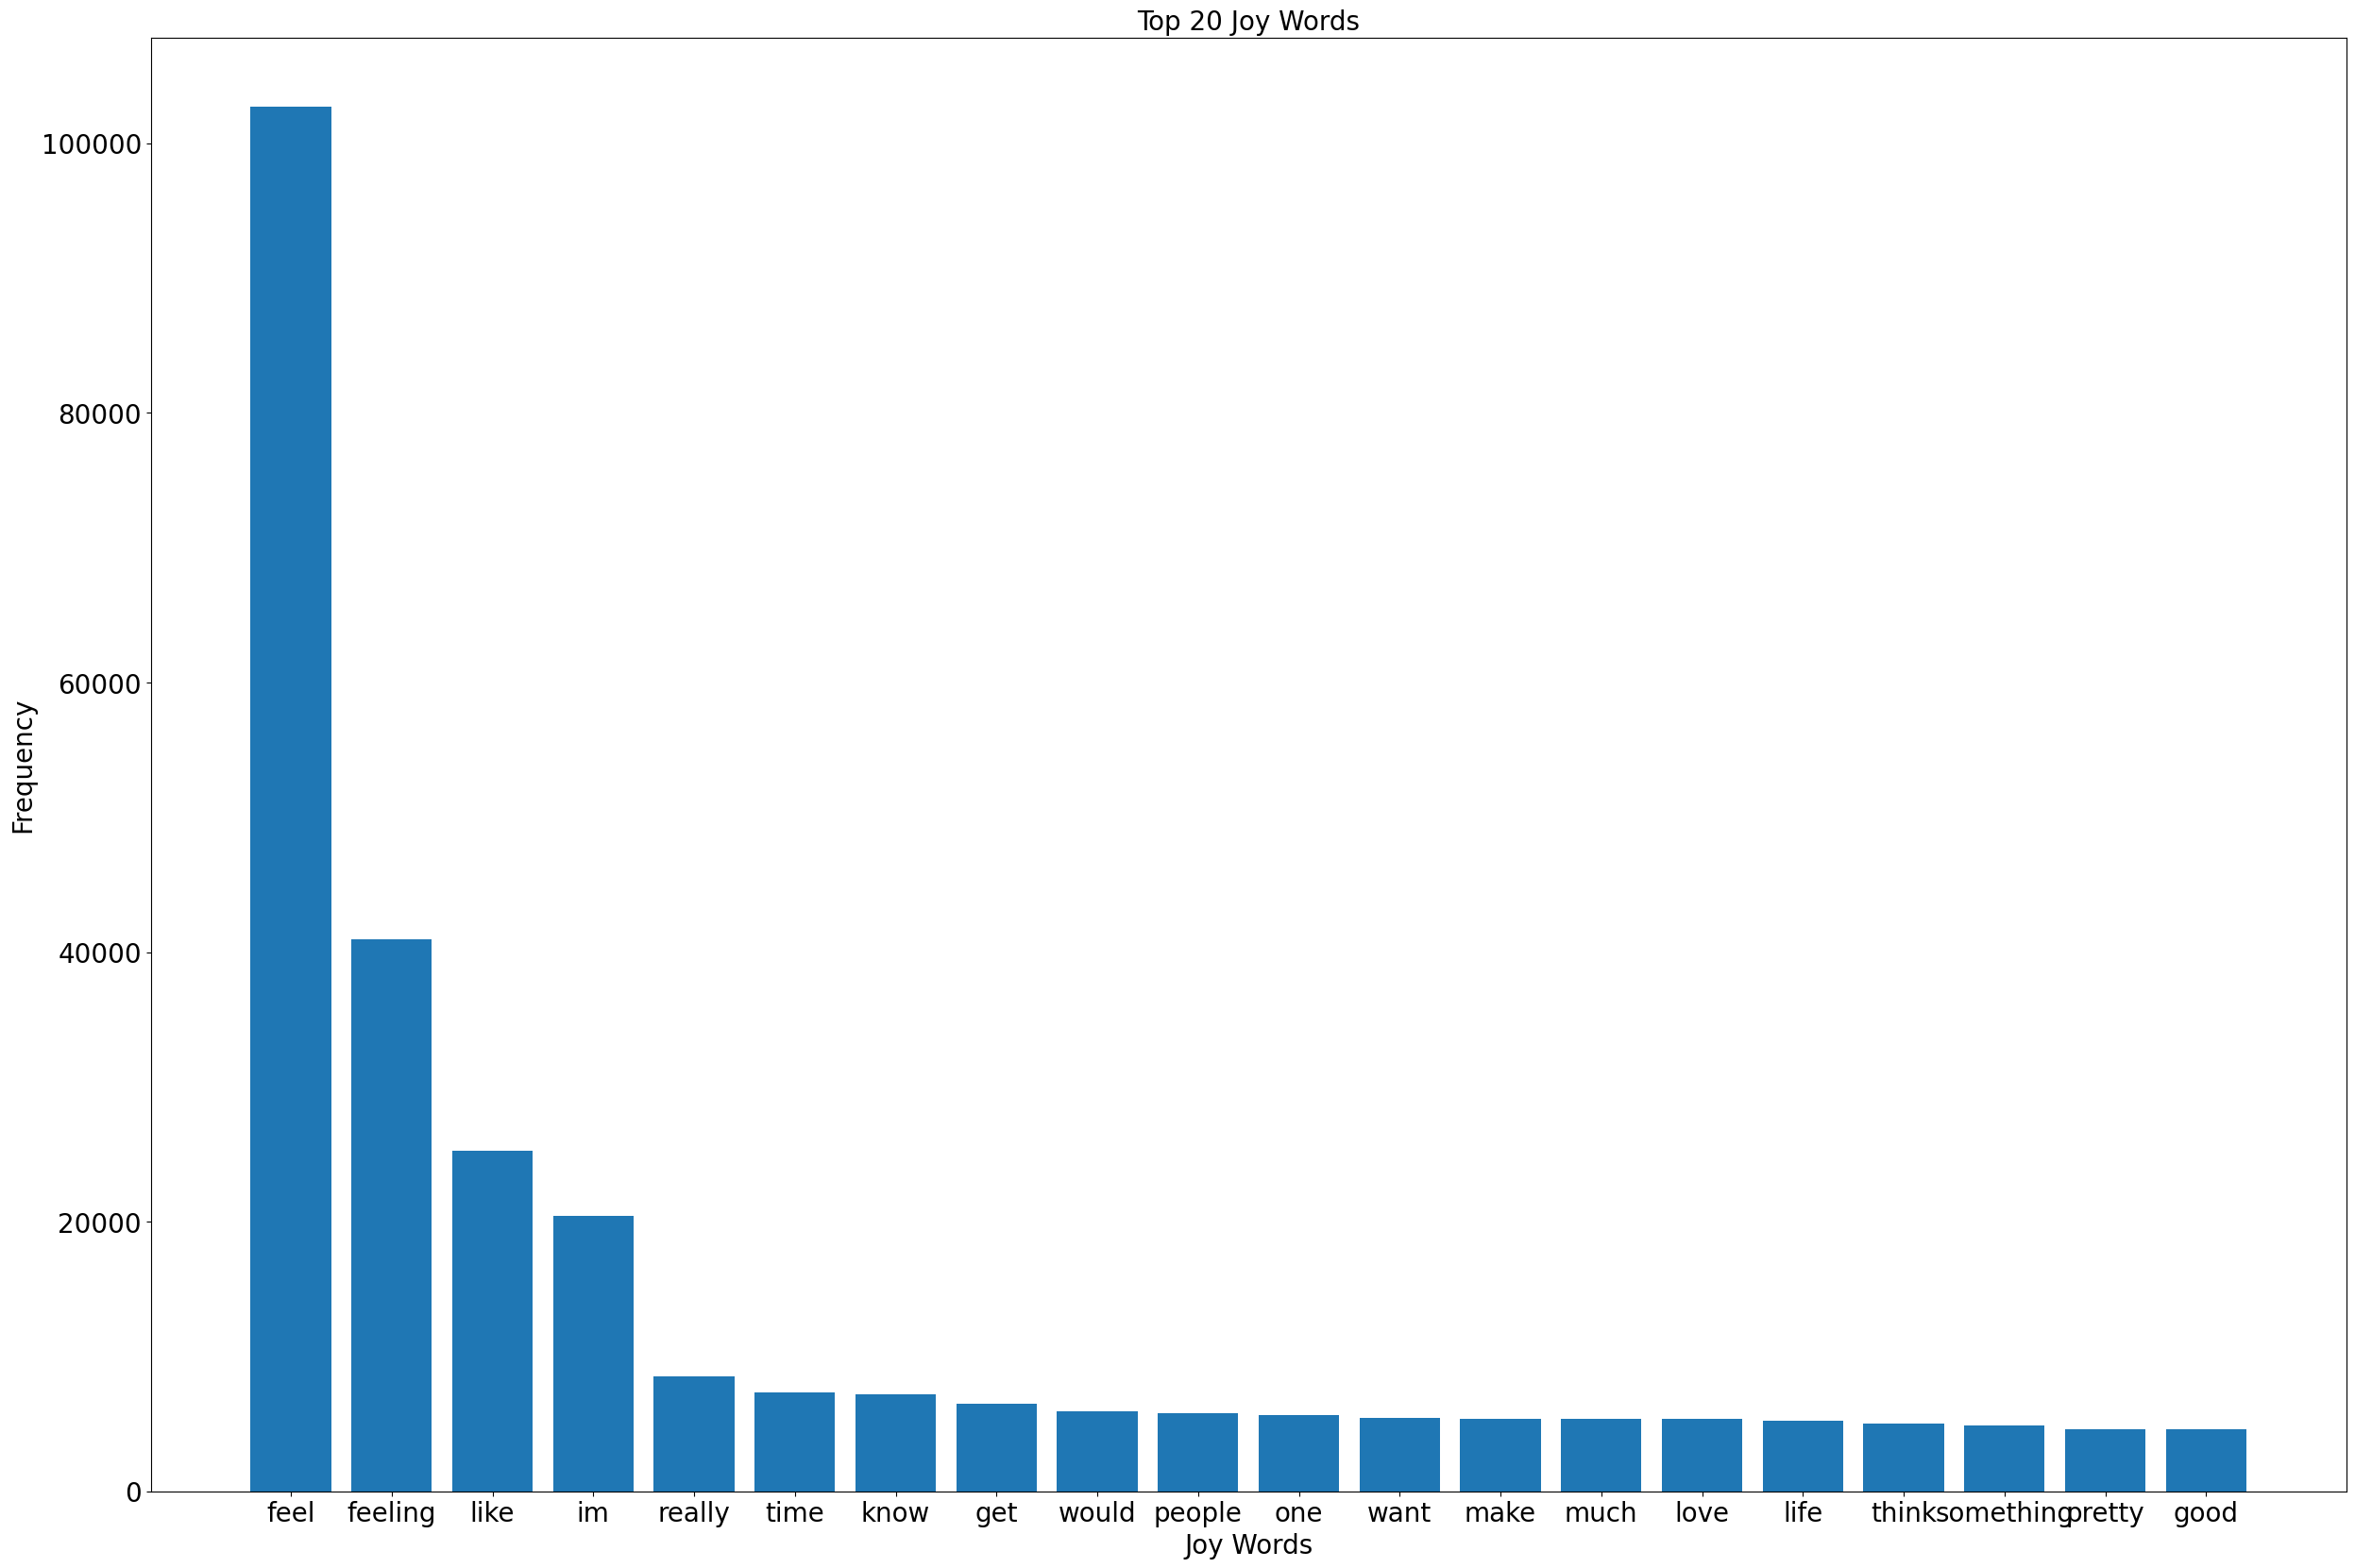

In [71]:
x1 = list(joy_dict.keys())[:20]
y1 = [value for key, value in list(joy_dict.items())[:20]]

plt.figure(figsize=(30,20))
plt.bar(x1,y1)
plt.xlabel("Joy Words",fontsize=20)
plt.xticks(fontsize=20)
plt.ylabel("Frequency", fontsize=20)
plt.yticks(fontsize=20)
plt.title("Top 20 Joy Words",fontsize=20)
plt.show()

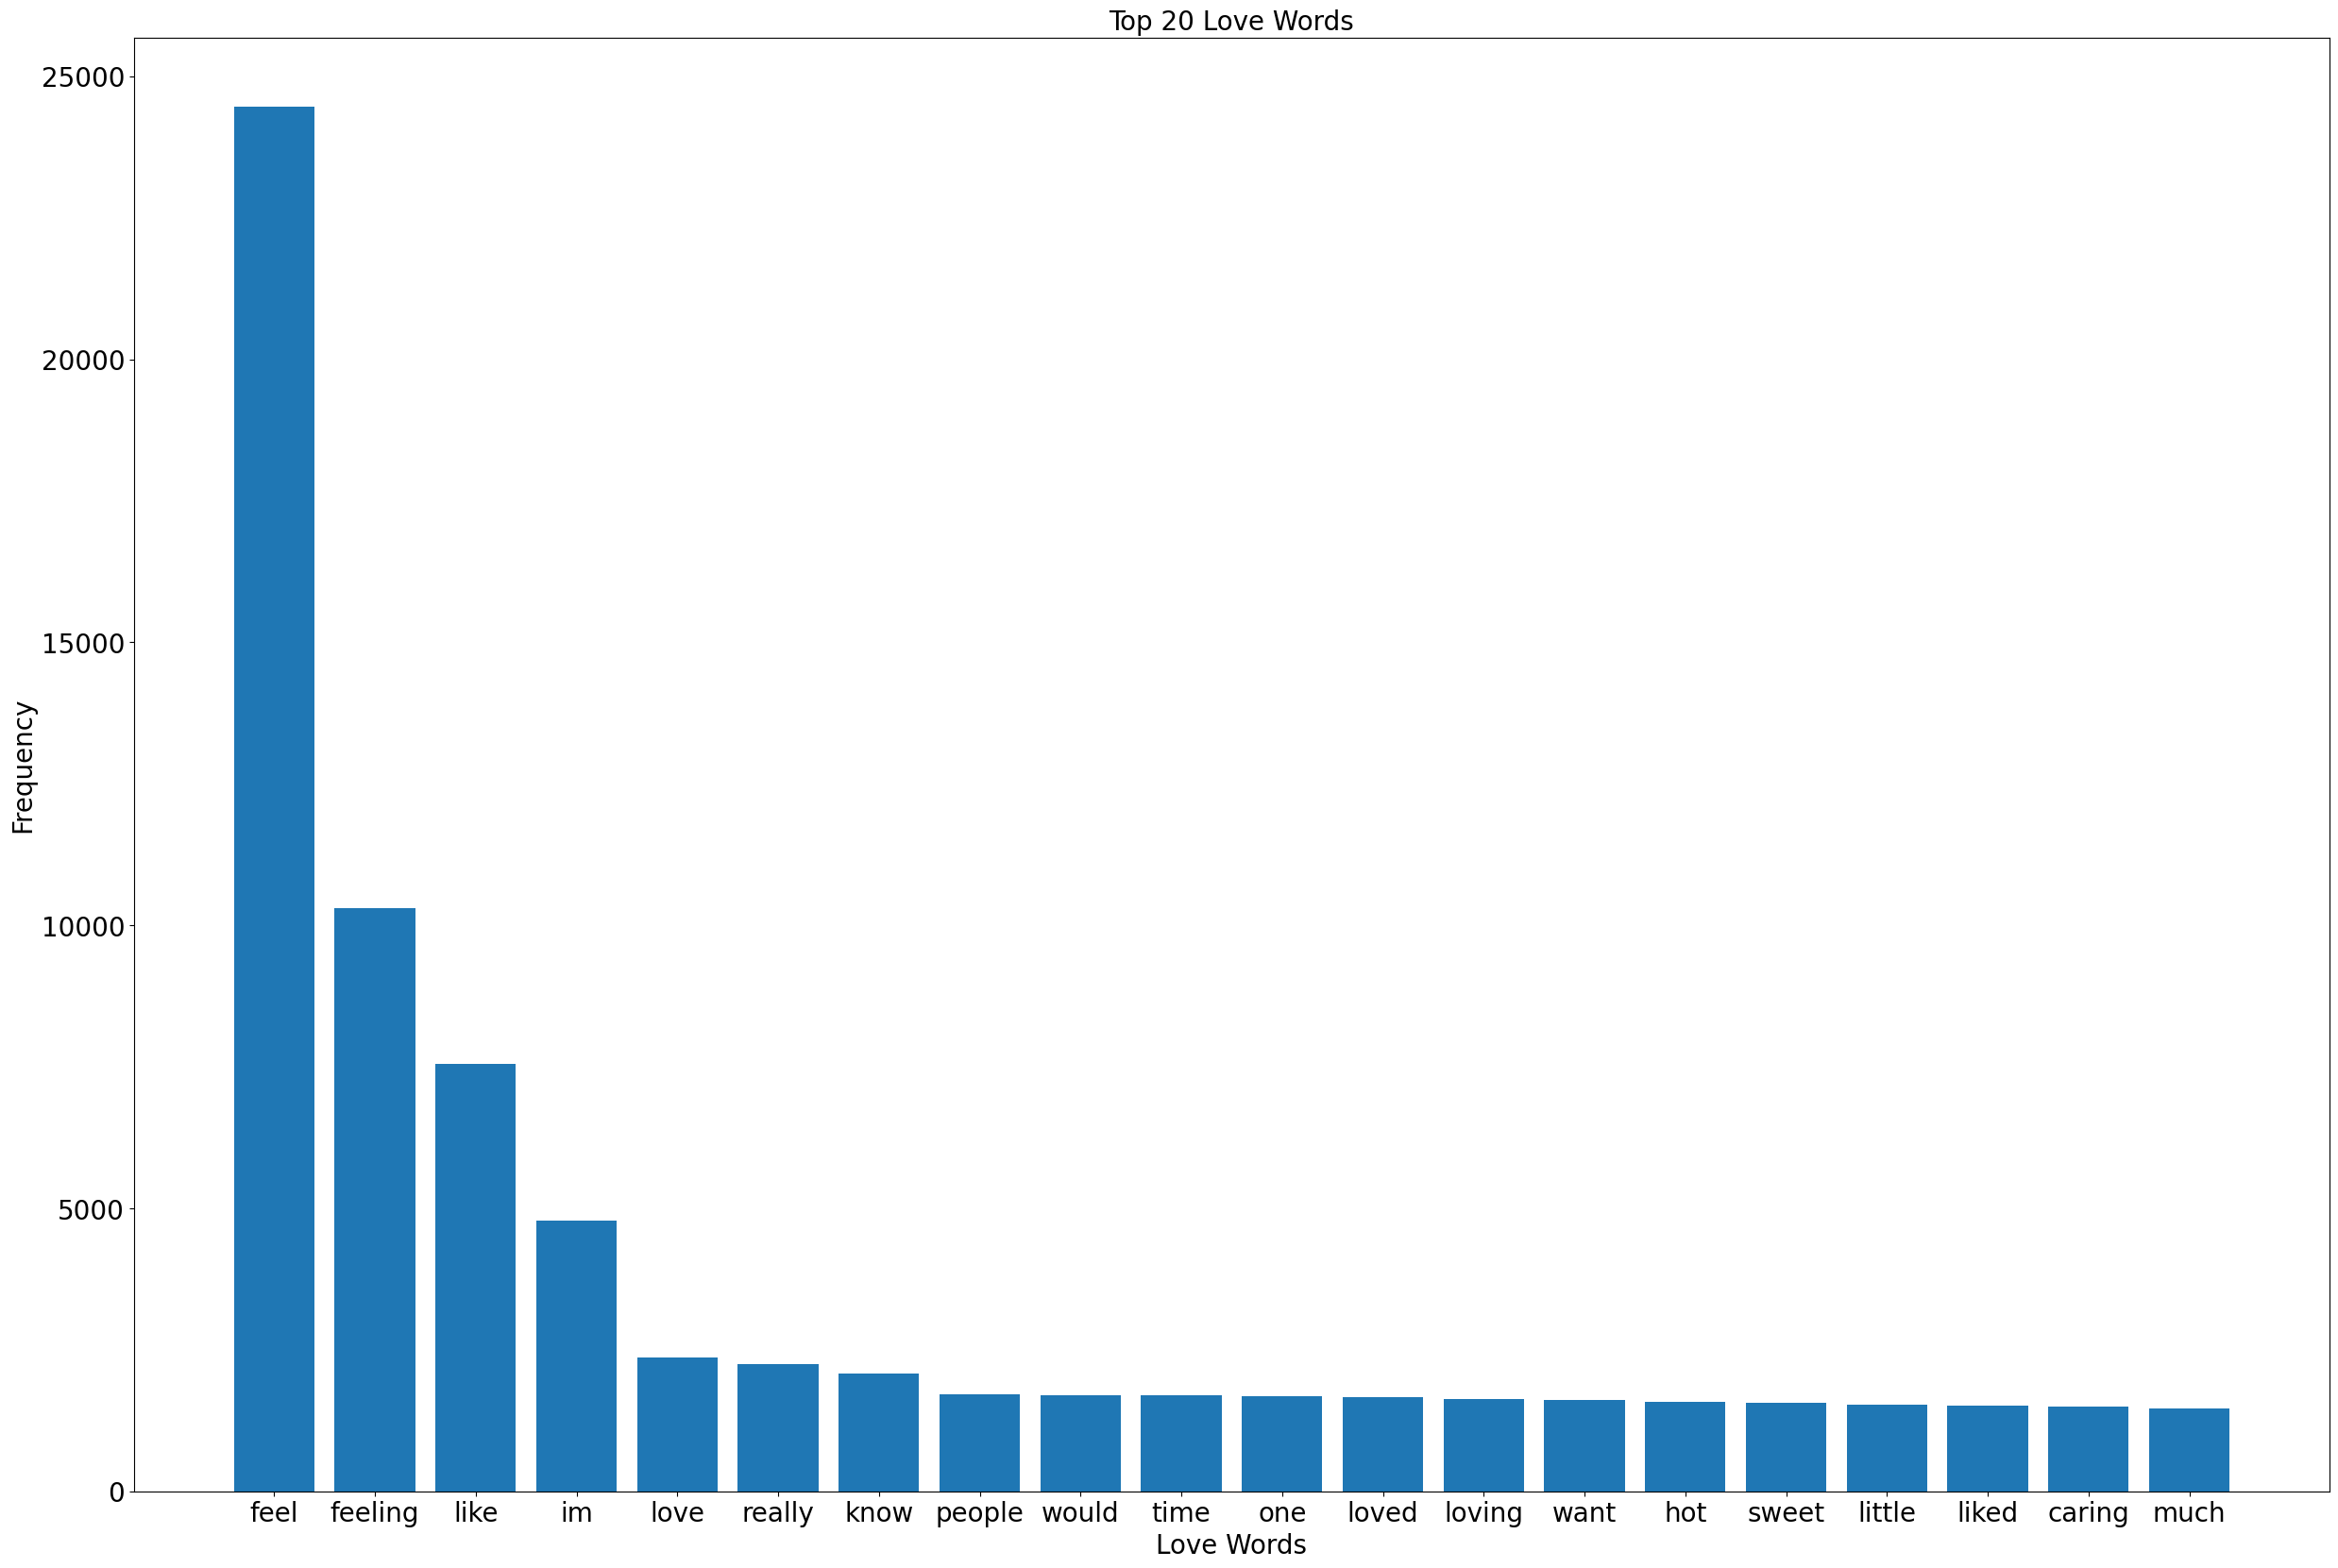

In [72]:
x2 = list(love_dict.keys())[:20]
y2 = [value for key, value in list(love_dict.items())[:20]]

plt.figure(figsize=(30,20))
plt.bar(x2,y2)
plt.xlabel("Love Words",fontsize=20)
plt.xticks(fontsize=20)
plt.ylabel("Frequency",fontsize=20)
plt.yticks(fontsize=20)
plt.title("Top 20 Love Words",fontsize=20)
plt.show()

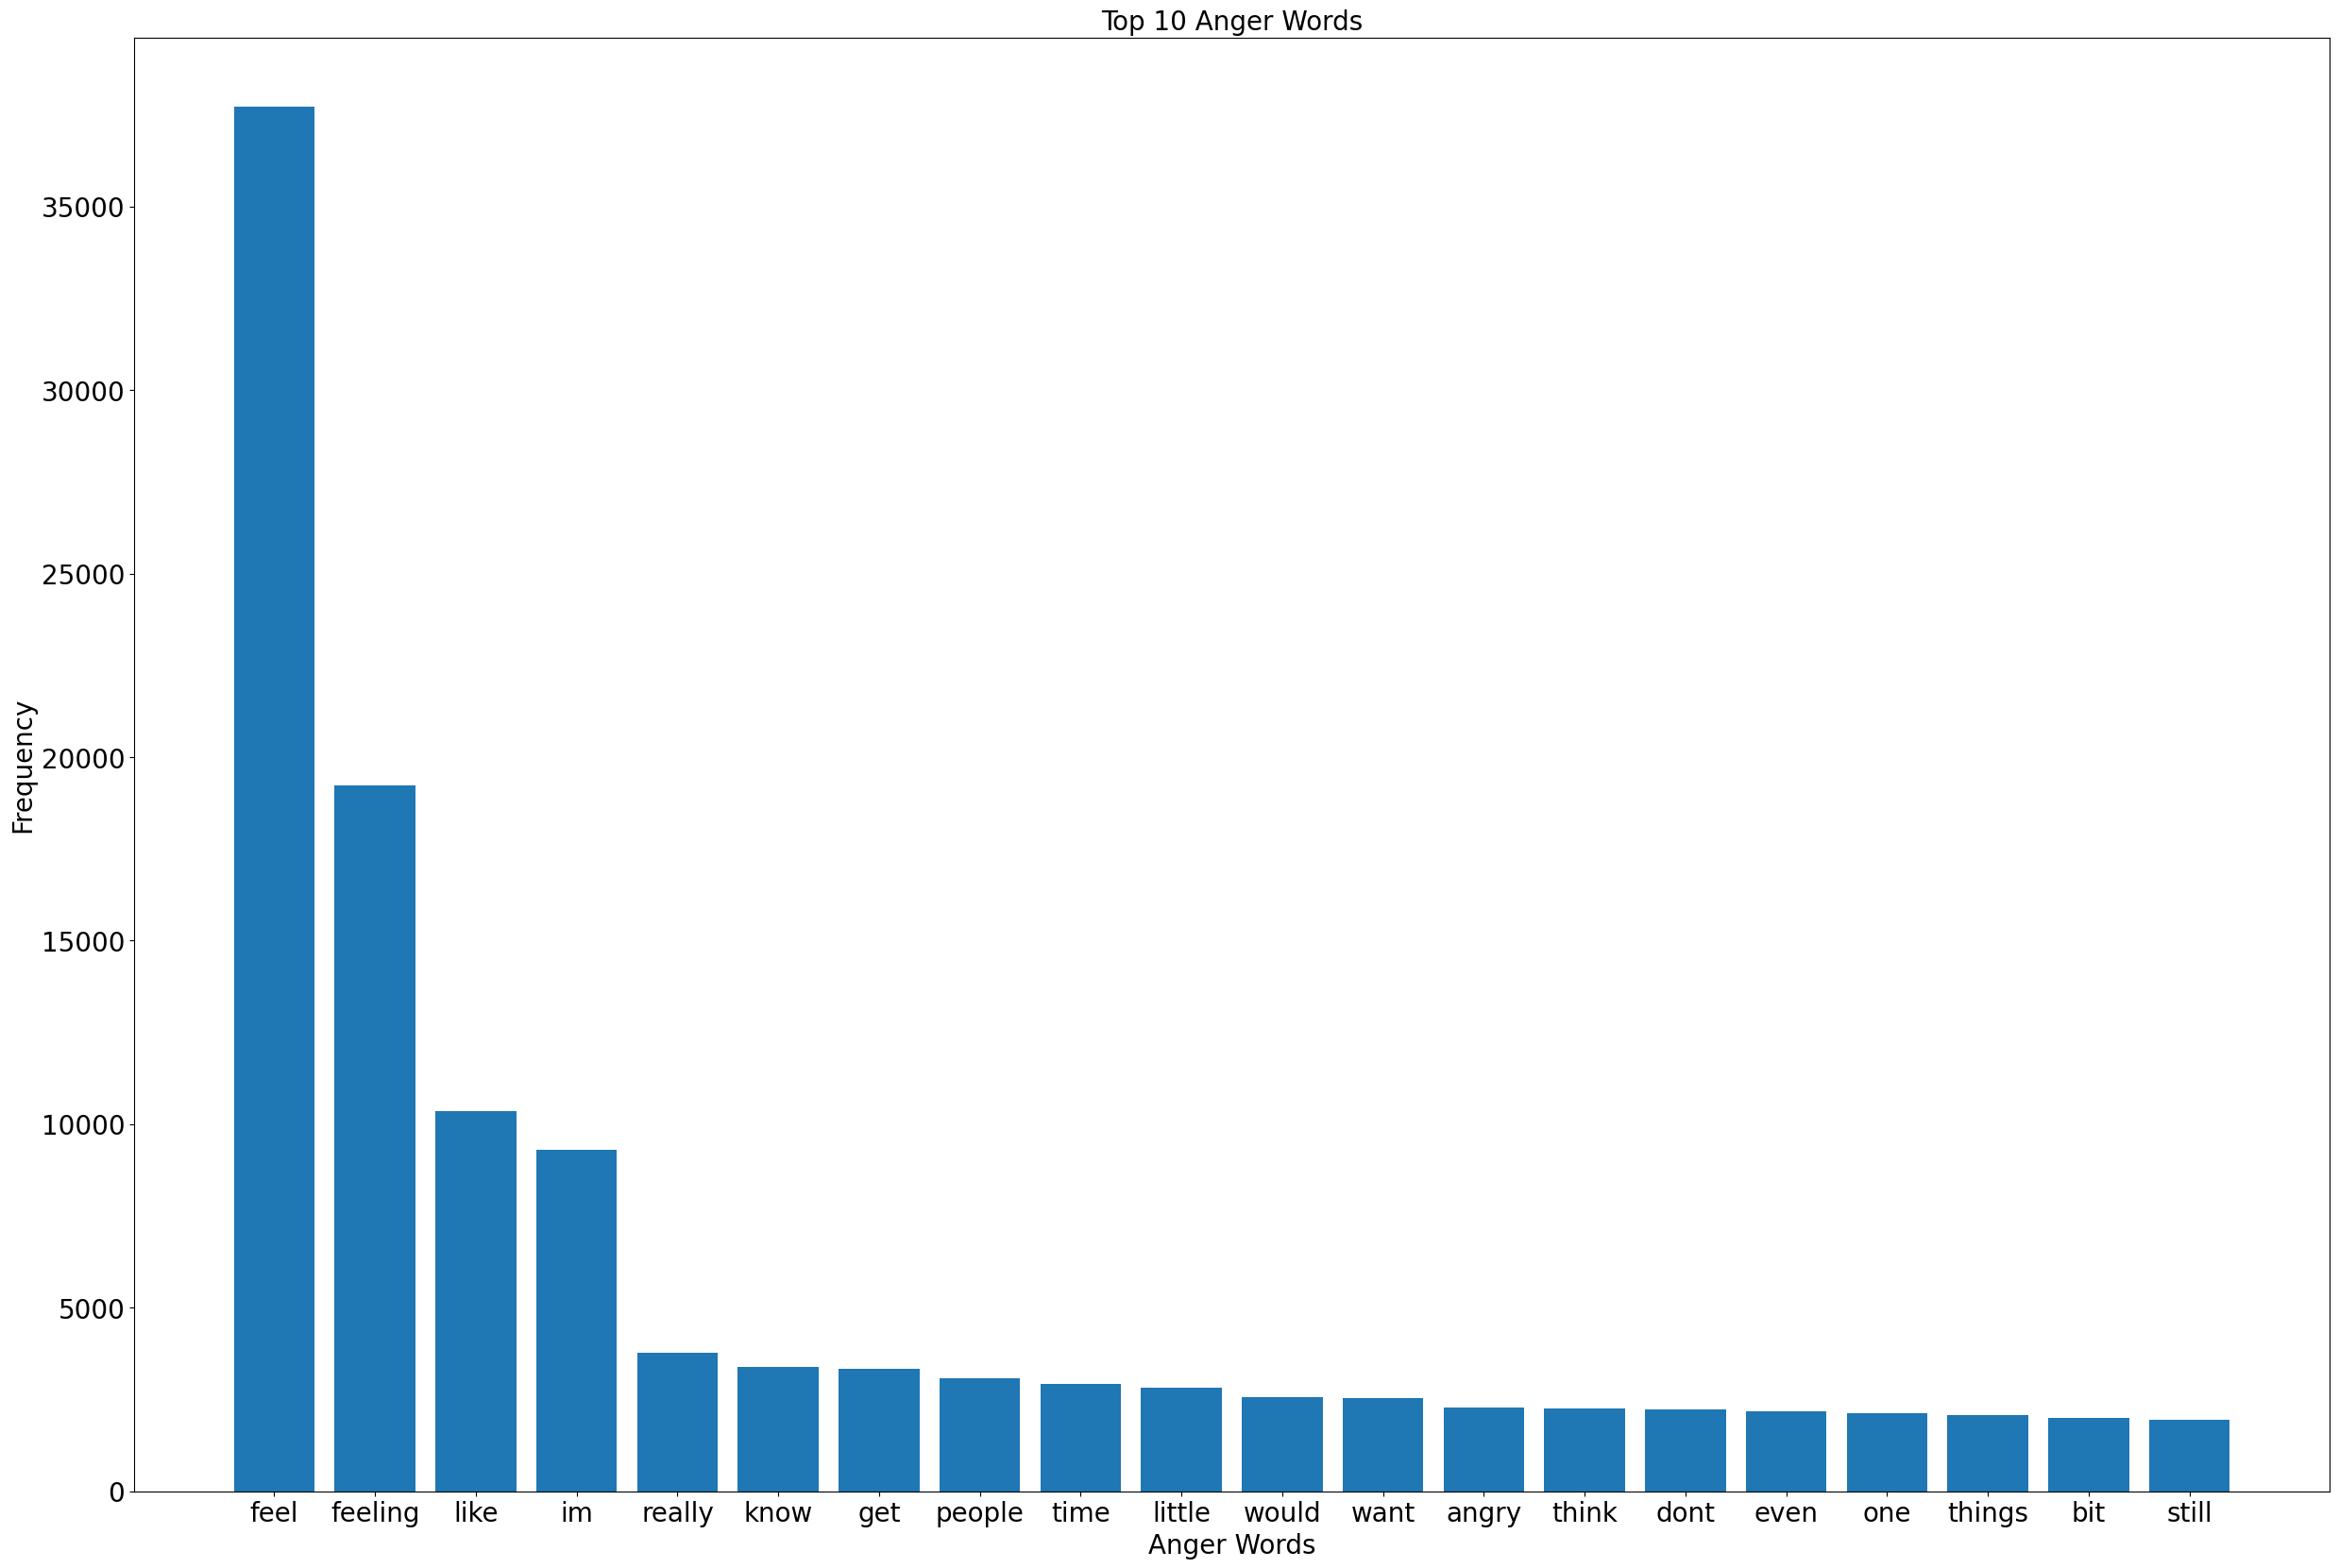

In [73]:
x3 = list(anger_dict.keys())[:20]
y3 = [value for key, value in list(anger_dict.items())[:20]]

plt.figure(figsize=(30,20))
plt.bar(x3,y3)
plt.xlabel("Anger Words",fontsize=20)
plt.xticks(fontsize=20)
plt.ylabel("Frequency",fontsize=20)
plt.yticks(fontsize=20)
plt.title("Top 10 Anger Words",fontsize=20)
plt.show()

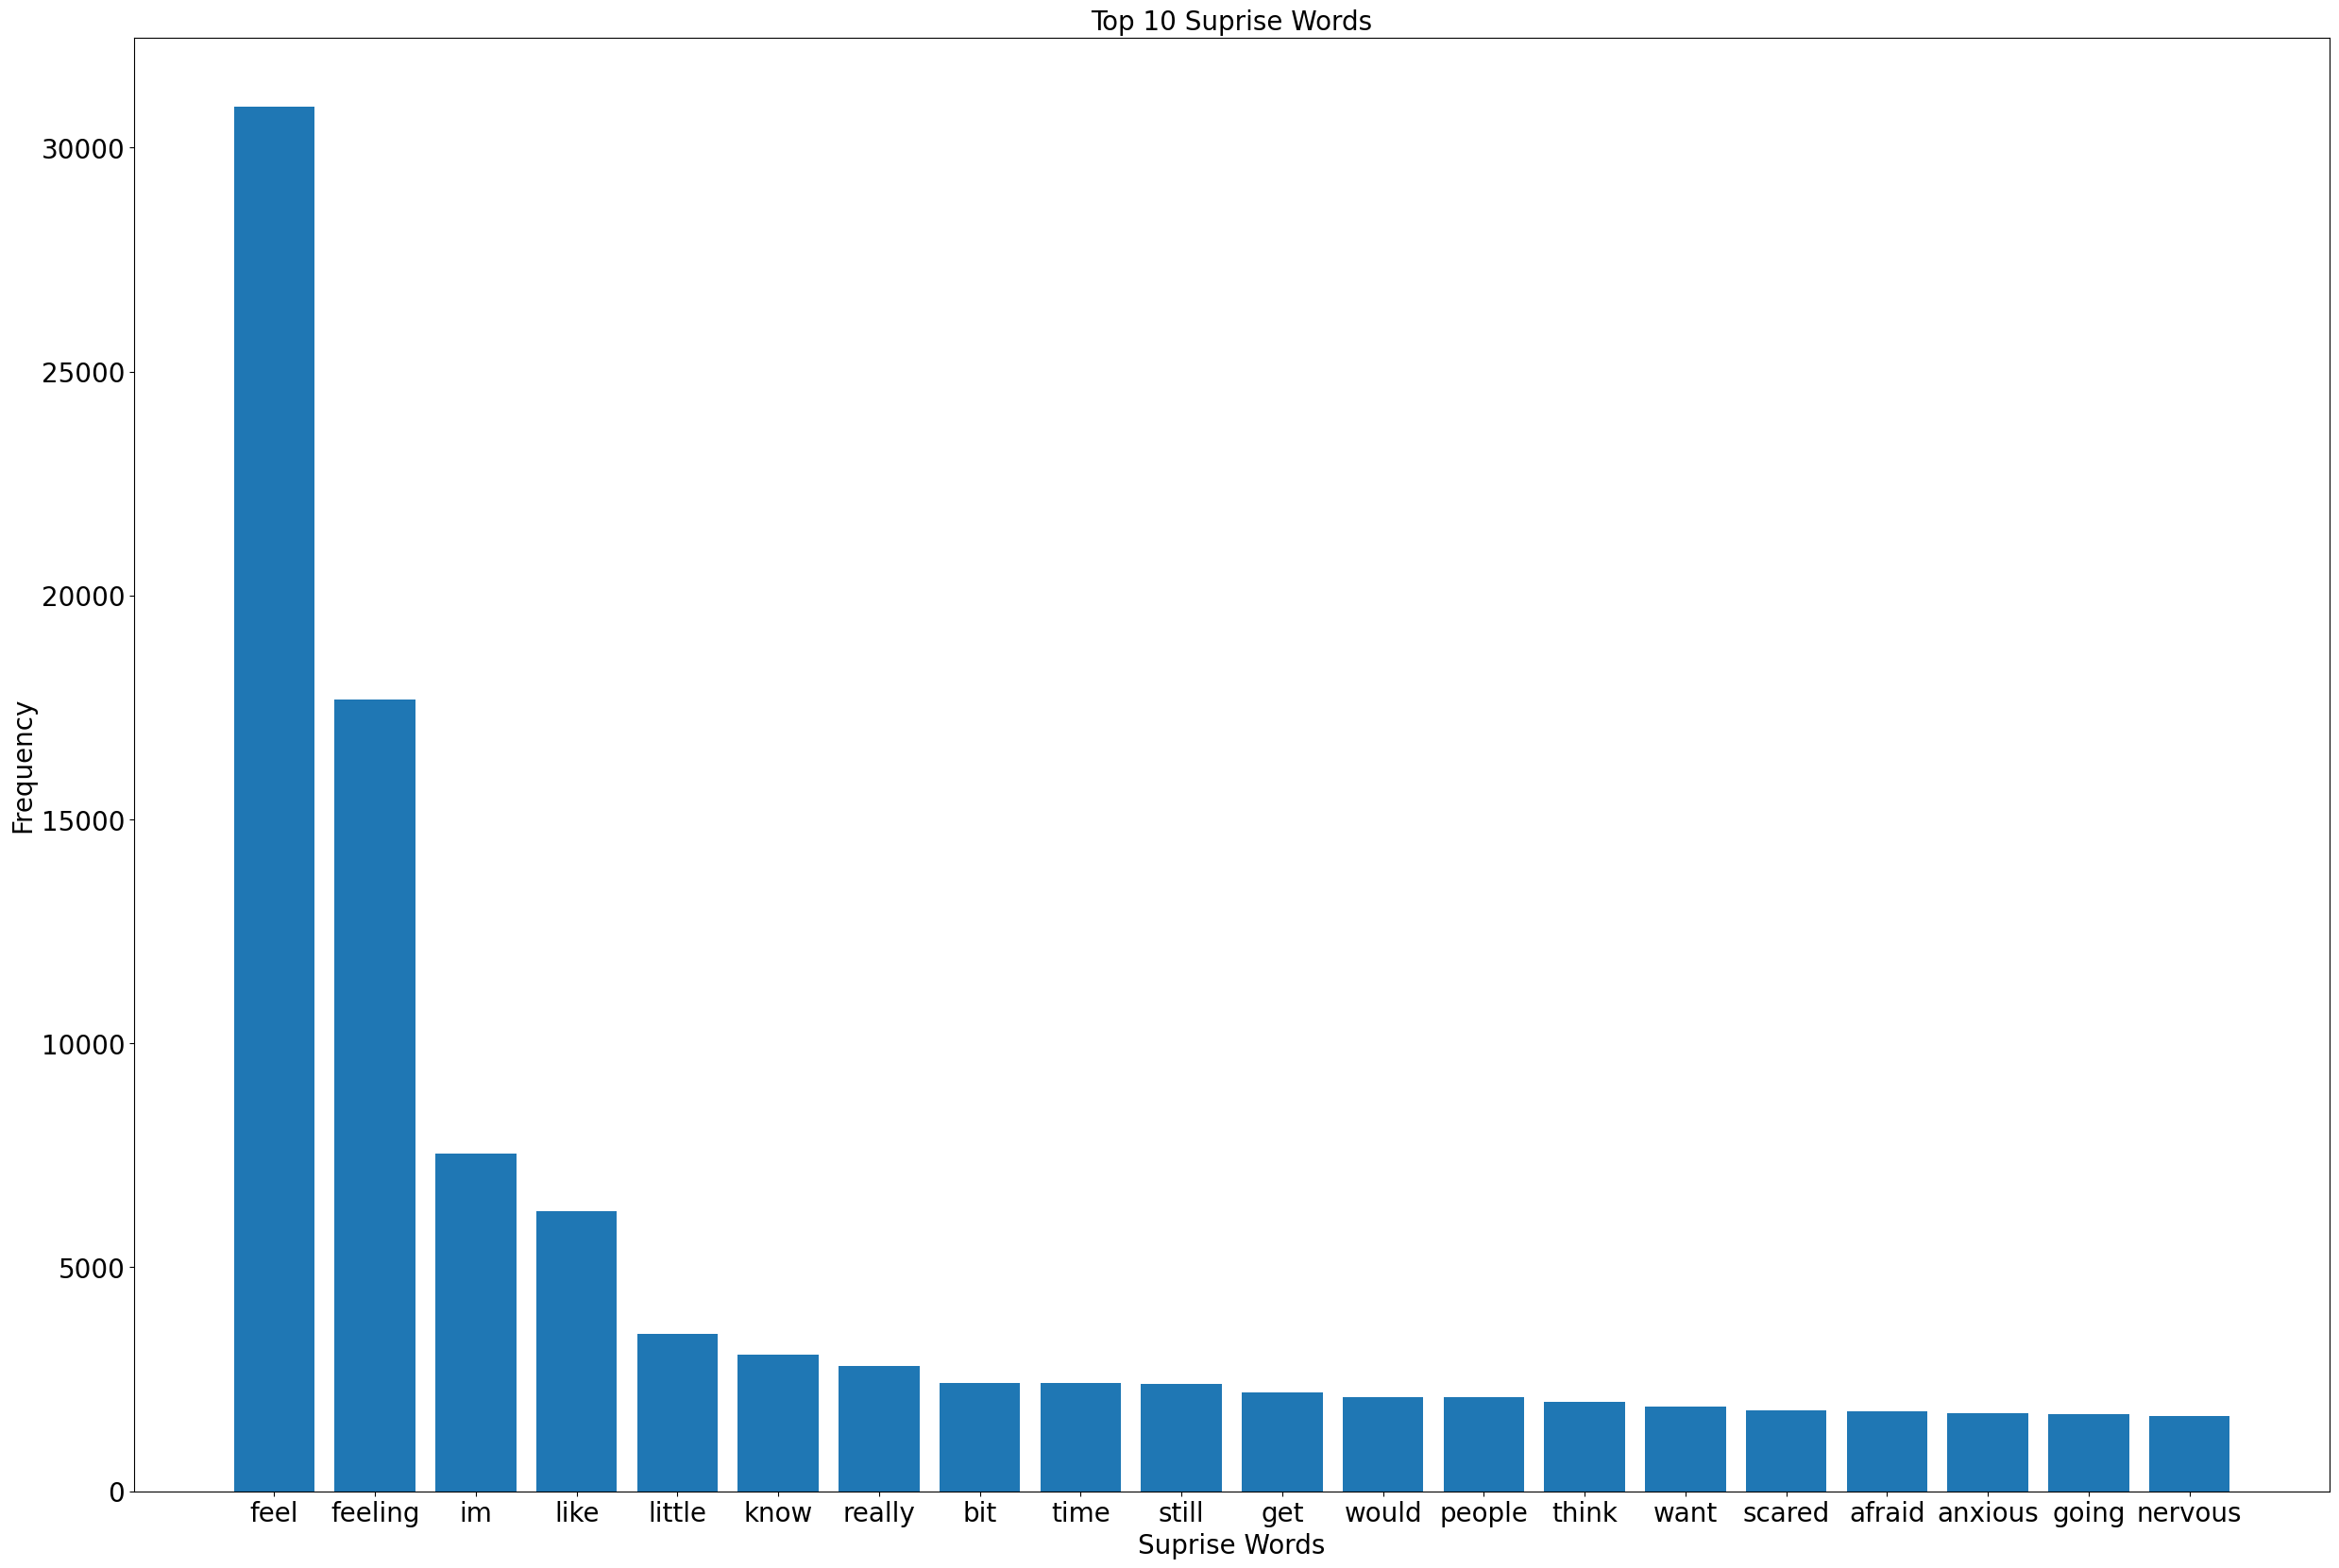

In [74]:
x4 = list(suprise_dict.keys())[:20]
y4 = [value for key, value in list(suprise_dict.items())[:20]]

plt.figure(figsize=(30,20))
plt.bar(x4,y4)
plt.xlabel("Suprise Words",fontsize=20)
plt.xticks(fontsize=20)
plt.ylabel("Frequency",fontsize=20)
plt.yticks(fontsize=20)
plt.title("Top 10 Suprise Words",fontsize=20)
plt.show()

In [75]:
from tensorflow.keras import backend as K
K.clear_session()

TRAIN THE MODEL

TRAIN TEST SPLIT

In [76]:
df1 = emotion_data.copy()

X_train, X_test, y_train, y_test = train_test_split(df1['text'], df1['label'], test_size=0.2, random_state=42)
print(df1)
print(X_train.ndim)
print(y_train.ndim)

                                                     text  label
0                      feel really helpless heavy hearted      4
1       ive enjoyed able slouch relax unwind frankly n...      0
2                 gave internship dmrg feeling distraught      4
3                                     dont know feel lost      0
4       kindergarten teacher thoroughly weary job take...      4
...                                                   ...    ...
416804  feel like telling horny devils find site suite...      2
416805  began realize feeling agitated restless would ...      3
416806  feel curious previous early dawn time seek tro...      5
416807  feel becuase tyranical nature government el sa...      3
416808  think spent time investigating surroundings th...      5

[416809 rows x 2 columns]
1
1


TOKENIZE THE STRINGS, MAX 50000 AND MAKE SURE STRINGS GET SPLIT UP AND TOKENIZED

In [77]:
tokenizer = Tokenizer(num_words=50000)
tokenizer.fit_on_texts(X_train)

print(X_train.size)
print(X_train.ndim)

333447
1


Pad X_train and X_test so that all strings have the same length of 100

In [78]:
X_train_padded = pad_sequences(tokenizer.texts_to_sequences(X_train), maxlen=100, padding='post')
X_test_padded = pad_sequences(tokenizer.texts_to_sequences(X_test), maxlen=100, padding='post')

print(X_train_padded.size)
print(len(X_train_padded))
print(y_train.size)
print(X_train_padded.ndim)
print(y_train.ndim)

33344700
333447
333447
2
1


BUILD CNN LAYERS

In [83]:
"""model = keras.Sequential()

model.add(layers.Embedding(input_dim=50000, output_dim=16))
model.add(layers.Conv1D(filters=64, kernel_size=5, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Conv1D(filters=64, kernel_size=5, activation='relu'))
#model.add(layers.Dropout(0.2))
model.add(layers.Dense(64, activation='relu'))
#model.add(layers.Flatten())
#model.add(layers.Dense(10))"""

model = Sequential()
model.add(Embedding(input_dim=50000, output_dim=16, input_length=100))
model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=6, activation='softmax'))

/Users/jihyo/Desktop/NLP PROJECT /.venv/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:86: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [84]:
#callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

#model.fit(X_train_padded, y_train, epochs=50, validation_data=(X_test_padded, y_test), callbacks=[callback])

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_2          │ ?                      │   0 (unbuilt) │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)